In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 读取图像
img = cv2.imread("./body_x_ray.jpg", cv2.IMREAD_GRAYSCALE)

In [3]:
# 傅里叶变换
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# 构建频率域中心点的网格
rows, cols = img.shape
crow, ccol = rows//2, cols//2
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
x -= ccol
y -= crow

In [4]:
# 计算每个网格点到中心点的距离
d = np.sqrt(x**2 + y**2)

In [5]:
# 计算高斯高通滤波器的权值
H = []
D0 = 100
H = 1 - np.exp(-d**2 / (2 * D0**2))

In [6]:
# 将高斯高通滤波器的权值乘以频率域中的像素值
fshift_filtered = H * fshift

In [7]:
# 反傅里叶变换
f_filtered = np.fft.ifftshift(fshift_filtered)
img_filtered = np.fft.ifft2(f_filtered).real
img_filtered = np.uint8(np.clip(img_filtered, 0, 255))  # 将像素值限制在0到255之间

In [8]:
img_filtered

array([[ 0,  4,  7, ..., 20, 24, 36],
       [ 0,  0,  1, ...,  7, 11, 27],
       [ 0,  0,  0, ...,  2,  7, 23],
       ...,
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

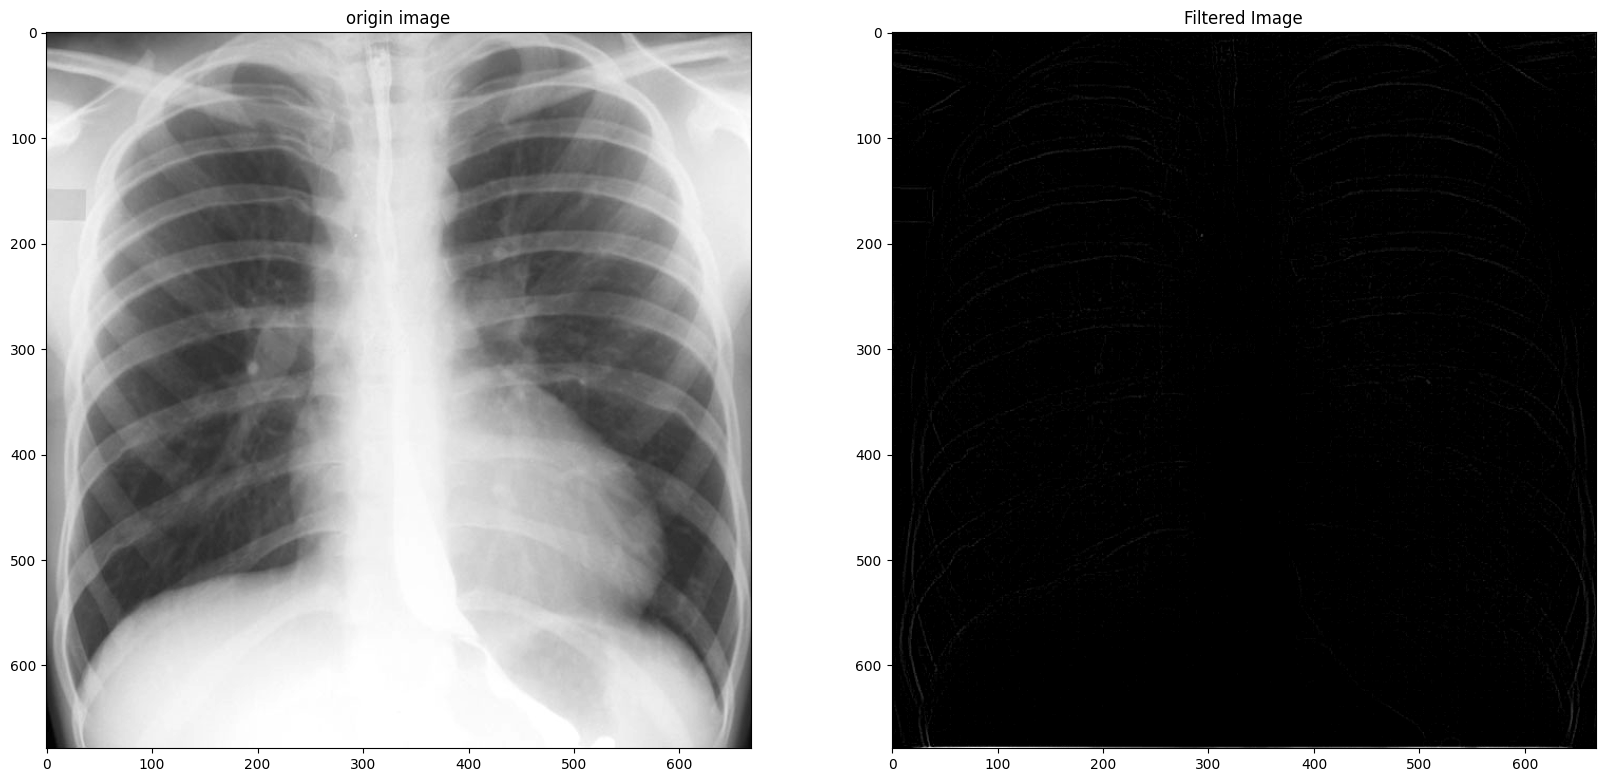

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('origin image')
axs[1].imshow(img_filtered, cmap='gray')
axs[1].set_title('Filtered Image')
plt.show()

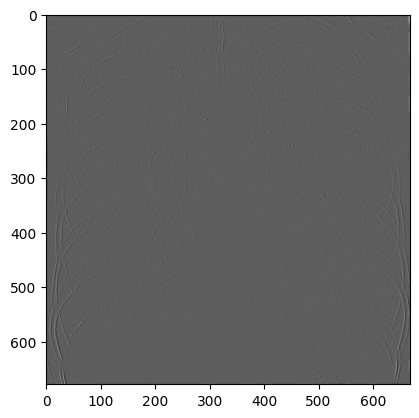

In [10]:
# 用灰底显示
sobelx = cv2.Sobel(img_filtered, cv2.CV_16S, 1, 0, ksize=0)
plt.imshow(sobelx,cmap='gray')
plt.show()

In [11]:
# 计算高频增强滤波器的权值
a = 0.5
b = 2.0
G = a + b * H

# 将高频增强滤波器的权值乘以频率域中的像素值
fshift_filtered = G * fshift

In [12]:
# 反傅里叶变换
f_filtered = np.fft.ifftshift(fshift_filtered)
img_filtered = np.fft.ifft2(f_filtered).real
img_filtered = np.uint8(np.clip(img_filtered, 0, 255))  # 将像素值限制在0到255之间

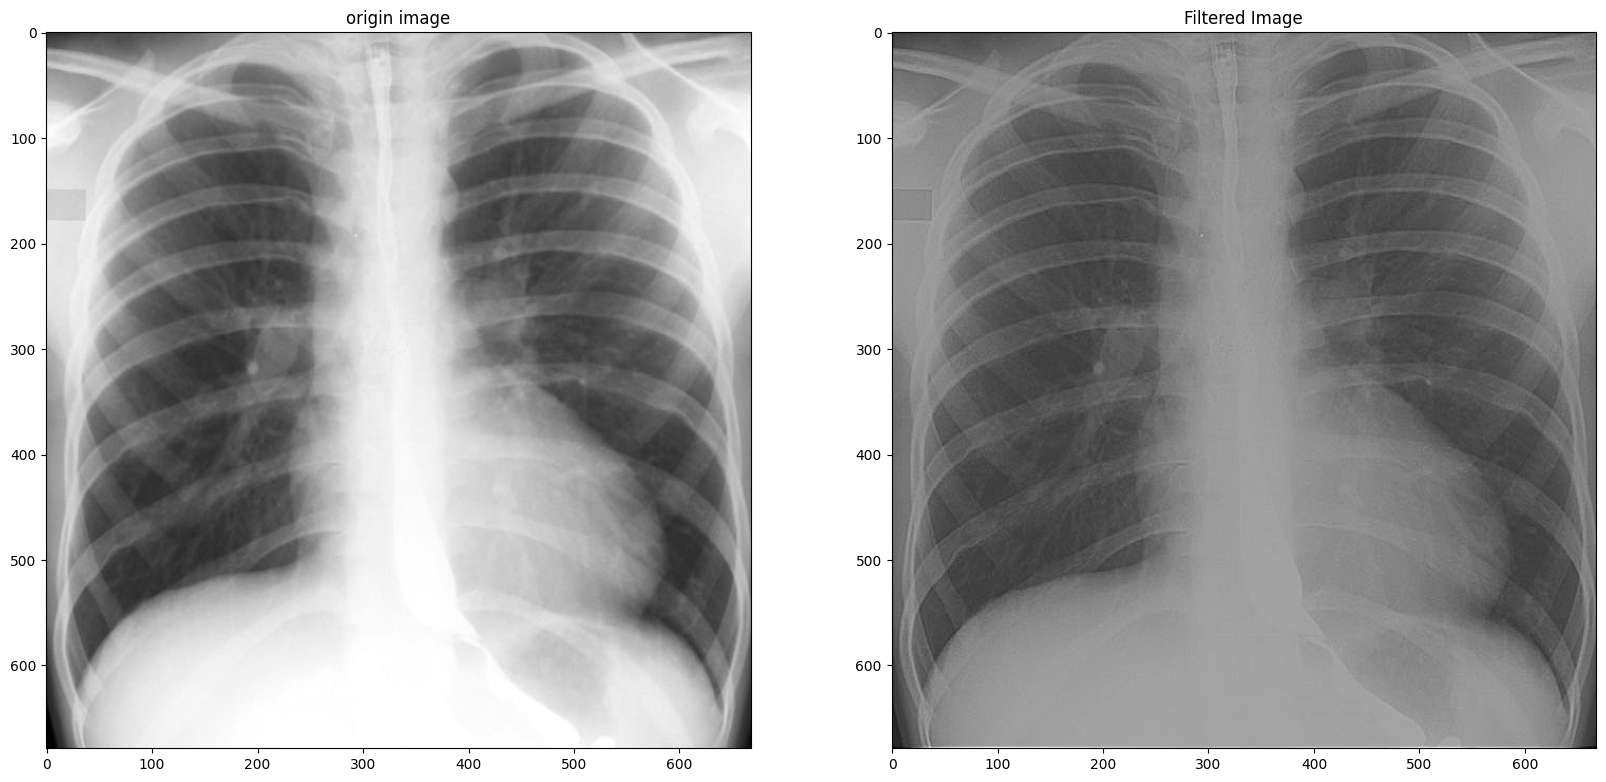

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('origin image')
axs[1].imshow(img_filtered, cmap='gray')
axs[1].set_title('Filtered Image')
plt.show()

In [14]:
# 直方图均衡化
img_equalized = cv2.equalizeHist(img_filtered)
img_equalized1 = cv2.equalizeHist(img)

# 将像素值限制在0到255之间
img_equalized = np.uint8(np.clip(img_equalized, 0, 255))
img_equalized1 = np.uint8(np.clip(img, 0, 255))

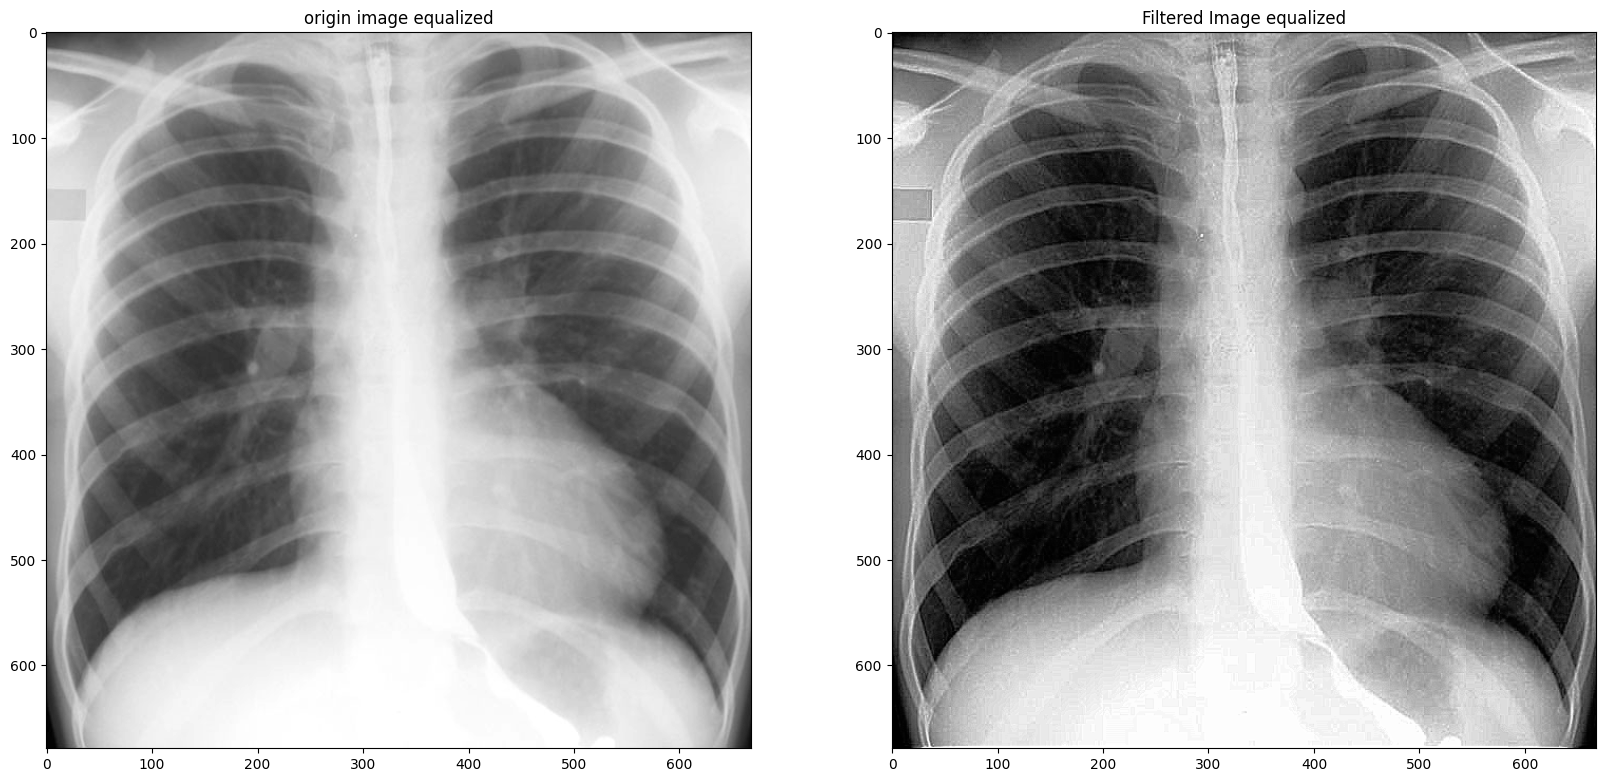

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
axs[0].imshow(img_equalized1, cmap='gray')
axs[0].set_title('origin image equalized')
axs[1].imshow(img_equalized, cmap='gray')
axs[1].set_title('Filtered Image equalized')
plt.show()

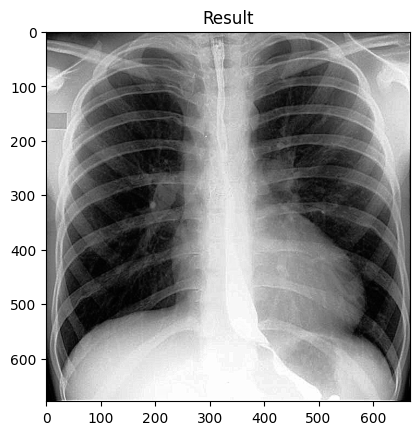

In [16]:
plt.imshow(img_equalized, cmap='gray')
plt.title('Result')
plt.show()